# Tutorial 4

## Question 1

### Step 1

In [1]:
def start_index(sequence):
    n = len(sequence)
    for i in range(n):
        if sequence[i:i+3] == "AUG":
            break
    return i


rna_seq = "GCAUAUGUUCAUAUGAAUA"

j = start_index(rna_seq)
print(j)

4


### Step 2


In [2]:
def translate(codon):
    genetic_code = ["GCA", "GCC", "GCG", "GCU", "UGC", "UGU", "GAC", "GAU", "GAA", "GAG", "UUC", "UUU", "GGA", "GGC", "GGG", "GGU", "CAC", "CAU", "AUA", "AUC", "AUU", "AAA", "AAG", "UUA", "UUG", "CUA", "CUC", "CUG", "CUU", "AUG",                         "AAC", "AAU", "CCA", "CCC", "CCG", "CCU", "CAA", "CAG", "AGA", "AGG", "CGA", "CGC", "CGU", "CGG", "AGC", "AGU", "UCA", "UCC", "UCG", "UCU", "ACA", "ACC", "ACG", "ACU", "GUA", "GUC", "GUG", "GUU", "UGG", "UAC",                         "UAU", "UAG", "UAA", "UGA"]

    amino_acids = ["A", "A", "A", "A", "C", "C", "D", "D", "E", "E", "F", "F", "G", "G", "G", "G", "H", "H", "I", "I", "I", "K", "K", "L", "L", "L", "L", "L", "L", "M", "N", "N", "P", "P", "P", "P", "Q", "Q", "R", "R", "R", "R",                         "R", "R", "S", "S", "S", "S", "S", "S", "T", "T", "T", "T", "V", "V", "V", "V", "W", "Y", "Y", "!", "!", "!"]
    i = genetic_code.index(codon)
    aa = amino_acids[i]
    return aa

x = translate("AAA")
print(x)

K


### Step 3

In [3]:
def translate_sequence(sequence):
    j = start_index(sequence)
    n = len(sequence)
    result = ""
    for i in range(j, n-3, 3):
        codon = sequence[i:i+3]
        if codon == "UAG" or codon == "UAA" or codon == "UGA":
            break
        else:
            result = result + translate(codon)
    return result
    

rna_seq = "GCAUAUGUUCAUAUGAAUA"
aa = translate_sequence(rna_seq)
print(aa)

MFI


### Step 4

In [4]:
rna_1 = "CAACAAUGCUCCCCGCCUAGUUG"
print(translate_sequence(rna_1))

rna_2 = "UAAAAUGAAUAAUAGAUAA"
print(translate_sequence(rna_2))

MLPA
MNNR


## Question 2

The answer below includes only the English and French languages. It is not difficult to extend to further languages.

How might  you extend to an arbitrary number of languages...?

French


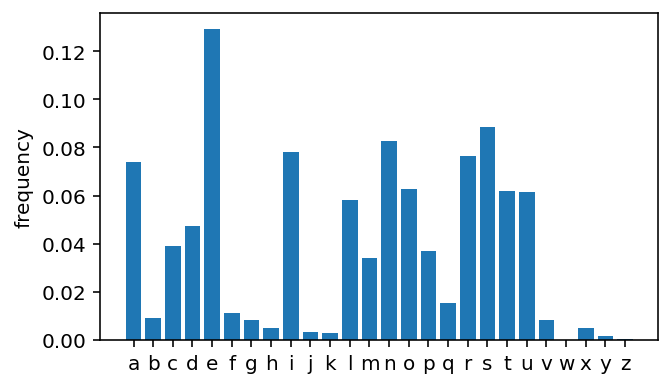

In [5]:
import matplotlib.pyplot as plt

freq_french = [7.60, 0.96, 3.39, 4.08, 14.47, 1.12, 1.18, 0.93, 7.21, 0.30, 0.16, 5.86, 2.78, 7.32, 5.39, 2.98, 0.85, 6.86, 7.98, 7.11, 5.55, 1.29, 0.08, 0.43, 0.34, 0.10]
s = sum(freq_french)
# ensure the sum is 1
for i in range(26):
    freq_french[i] /= s

freq_eng = [8.34, 1.54, 2.73, 4.14, 12.60, 2.03, 1.92, 6.11, 6.71, 0.23, 0.87, 4.24, 2.53, 6.80, 7.70, 1.66, 0.09, 5.68, 6.11, 9.37, 2.85, 1.06, 2.34, 0.20, 2.04, 0.06]
s = sum(freq_eng)
# ensure the sum is 1
for i in range(26):
    freq_eng[i] /= s


with open("french.txt") as f:
     text = f.read()

alphabet = "abcdefghijklmnopqrstuvwxyz"

counts = [0] * 26 # this syntax creates a list containing 26 zeros

text = text.lower()
for c in text:
    i = alphabet.find(c)
    if i > -1:
        counts[i] += 1

s = sum(counts)

for i in range(26):
    counts[i] = counts[i] / s

plt.figure(figsize=(5,3))
plt.bar(list(alphabet), counts)
plt.ylabel("frequency")

sim_eng = 0
sim_french = 0
for i in range(26):
    sim_eng += (freq_eng[i] - counts[i])**2
    sim_french += (freq_french[i] - counts[i])**2
    
m = min(sim_eng, sim_french)
if m == sim_eng:
    print("English")
elif m == sim_french:
    print("French")